# Electron Lengths


In [2]:
import ROOT

name = "validation7.root"
file = ROOT.TFile(name)

Welcome to JupyROOT 6.30/02


In [4]:
print_bool = False
# Create a new TFile for storing Compton events
electron_length = ROOT.TFile(f"electron_length_{name}", "RECREATE")

pre_event = -1
stored = False
electron_track = -1
transport = False
pre_detector = -1

# Create a new TTree for storing Compton events
electron_length_tree = ROOT.TTree("Hits", "Hits")
event = ROOT.vector('int')()
X0 = ROOT.vector('double')()
Y0 = ROOT.vector('double')()
Z0 = ROOT.vector('double')()
X1 = ROOT.vector('double')()
Y1 = ROOT.vector('double')()
Z1 = ROOT.vector('double')()
electron_track_id = ROOT.vector('int')()

# Define branches in the new TTree
electron_length_tree.Branch("Event", event)
electron_length_tree.Branch("X0", X0)
electron_length_tree.Branch("Y0", Y0)
electron_length_tree.Branch("Z0", Z0)
electron_length_tree.Branch("X1", X1)
electron_length_tree.Branch("Y1", Y1)
electron_length_tree.Branch("Z1", Z1)
electron_length_tree.Branch("TrackID", electron_track_id)


for line in file.Hits:
    # If new event and stored is True, fill the information to the new TTree
    if line.Event != pre_event and stored and not transport:
            if print_bool:
                print("Electron detected and stored due to new event") 
                print("Event: ", pre_event)
                print("X: ", pre_x)
                print("Y: ", pre_y)
                print("Z: ", pre_z)
                print("TrackID: ", electron_track)
            # Fill tree
            event.push_back(pre_event)
            X0.push_back(pre_x)
            Y0.push_back(pre_y)
            Z0.push_back(pre_z)
            X1.push_back(post_x)
            Y1.push_back(post_y)
            Z1.push_back(post_z)
            electron_track_id.push_back(electron_track)
            stored = False
            electron_track = -1
            pre_detector = -1
    else:
        transport = False
    # If photon is detected, store the information
    if line.ParticleID == 22 and line.ProcessName == "phot":
        pre_event = line.Event
        pre_x = line.X
        pre_y = line.Y
        pre_z = line.Z
        pre_detector = line.DetectorID
        photon_track = line.TrackID
    # If electron is detected, store the information
    elif line.ParticleID == 11 and line.Event == pre_event and line.ParentID == photon_track and line.DetectorID == pre_detector:
        # If new track id it means that the previous electron has ended
        if line.ProcessName == "Transport":
             transport = True
        if line.TrackID != electron_track and stored and not transport:
            # Fill tree
            event.push_back(pre_event)
            X0.push_back(pre_x)
            Y0.push_back(pre_y)
            Z0.push_back(pre_z)
            X1.push_back(post_x)
            Y1.push_back(post_y)
            Z1.push_back(post_z)
            electron_track_id.push_back(electron_track)
            stored = False
            electron_track = -1
            pre_detector = -1

            if print_bool:
                print("Electron detected and stored due to new trackID") 
                print("Event: ", line.Event)
                print("X: ", line.X)
                print("Y: ", line.Y)
                print("Z: ", line.Z)
                print("TrackID: ", line.TrackID)
           
        # If the same track id or first electron, store the information
        else:
            post_x = line.X
            post_y = line.Y
            post_z = line.Z
            stored = True
            electron_track = line.TrackID
            transport = False
        


electron_length_tree.Fill()
electron_length_tree.Write()
electron_length.Write()
electron_length.Close()

<img src = "https://www.researchgate.net/profile/Jorge-Cabello-3/publication/41669426/figure/fig3/AS:468526931681282@1488716933846/Electron-range-in-silicon-provided-by-NIST-blue-obtained-with-the-Monte-Carlo.png">

[range of deposition of electron in silicon](https://www.researchgate.net/publication/41669426_The_spatial_resolution_of_silicon-based_electron_detectors_in_b-autoradiography)

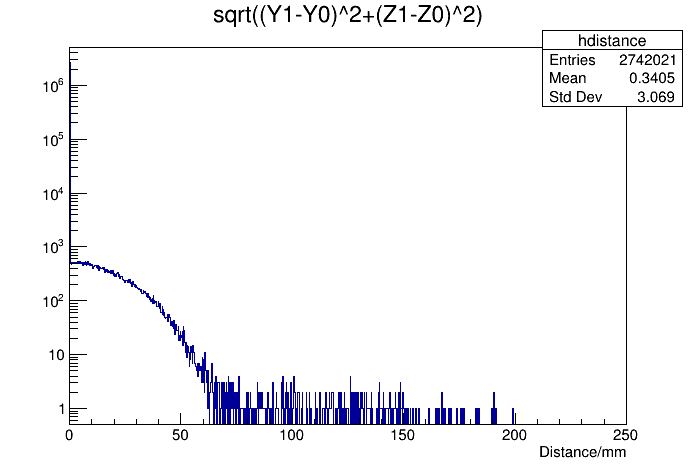

In [17]:
electron_length = ROOT.TFile(f"electron_length_{name}")
c1 = ROOT.TCanvas()
c1.SetLogy()
electron_length.Hits.Draw("sqrt((Y1-Y0)^2+(Z1-Z0)^2)>>hdistance(1000,0,250)", "", "")
hdistance = ROOT.gDirectory.Get("hdistance")
hdistance.GetXaxis().SetTitle("Distance/mm")
c1.Draw()



In [15]:
bin3um = hdistance.FindBin(0.003)

print(f'Porcentaje por debajo de  3um {hdistance.Integral(1, bin3um)/hdistance.Integral()}')

Porcentaje por debajo de  3um 0.4330749277109031


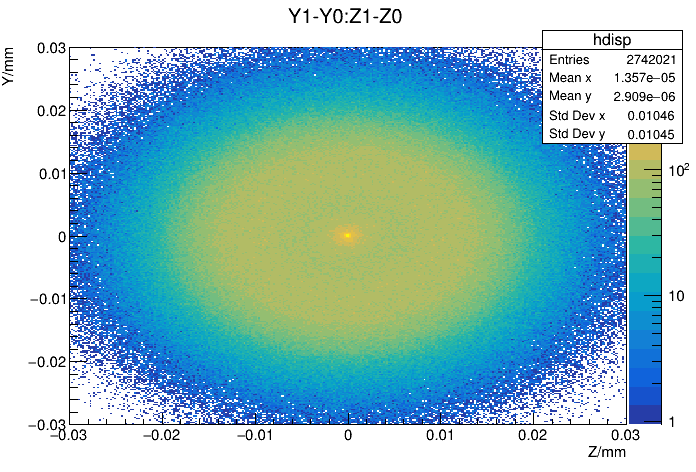

In [7]:
c2 = ROOT.TCanvas()
c2.SetLogz()
electron_length.Hits.Draw("Y1-Y0:Z1-Z0>>hdisp(300,-0.03,0.03,300,-0.03,0.03)", "", "colz")
hdisp = ROOT.gDirectory.Get("hdisp")
hdisp.GetXaxis().SetTitle("Z/mm")
hdisp.GetYaxis().SetTitle("Y/mm")
c2.Draw()

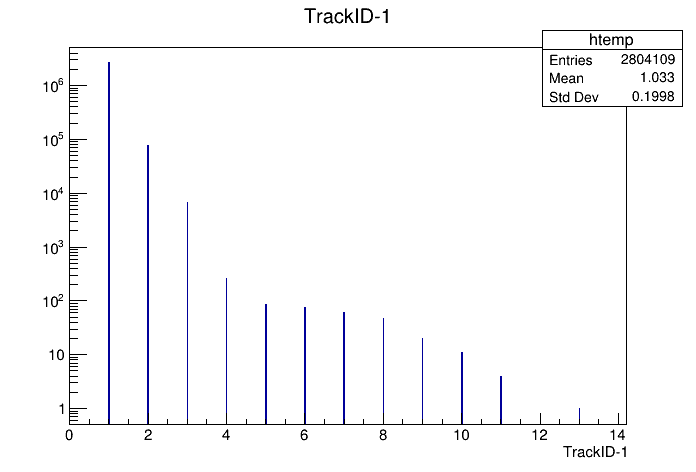

In [44]:
c3 = ROOT.TCanvas()
c3.SetLogy()
#electron_length.Hits.Draw("TrackID-1>>helectronnumber(15,-0.5,14.5)", "", "")
electron_length.Hits.Draw("TrackID-1", "", "")

c3.Draw()


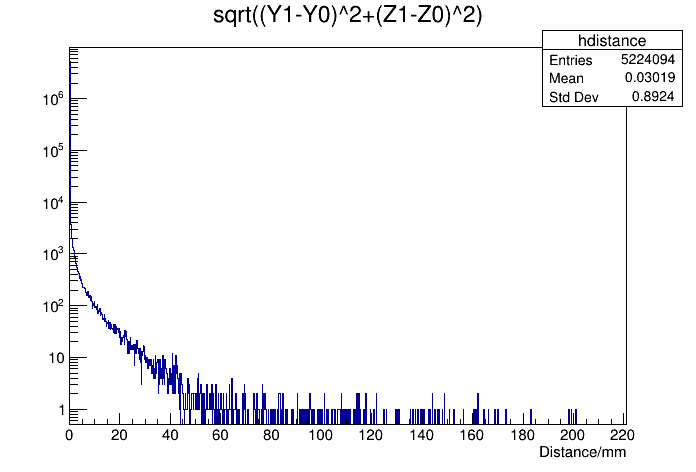

In [52]:
electron_length_compt = ROOT.TFile(f"electron_length_compt_{name}")
c1 = ROOT.TCanvas()
c1.SetLogy()
electron_length_compt.Hits.Draw("sqrt((Y1-Y0)^2+(Z1-Z0)^2)>>hdistance", "", "")
hdistance = ROOT.gDirectory.Get("hdistance")
hdistance.GetXaxis().SetTitle("Distance/mm")
c1.Draw()


In [46]:
c2 = ROOT.TCanvas()
electron_length_compt.Hits.Draw("Y1-Y0:Z1-Z0>>hdisp", "", "")
hdisp = ROOT.gDirectory.Get("hdisp")
hdisp.GetXaxis().SetTitle("Z/mm")
hdisp.GetYaxis().SetTitle("Y/mm")
c2.Draw()

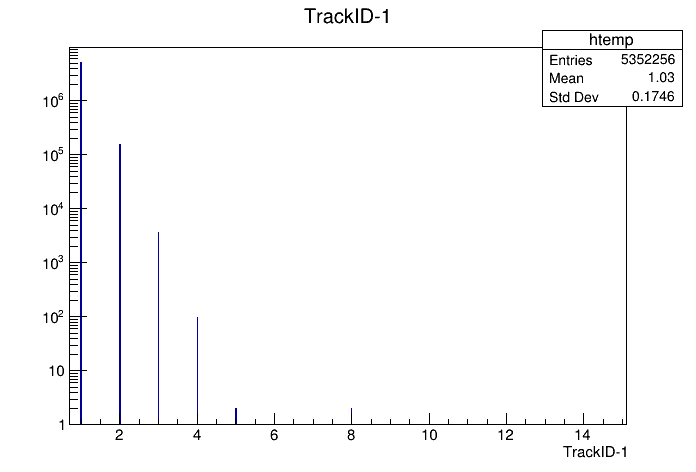

In [47]:
c3 = ROOT.TCanvas()
c3.SetLogy()
#electron_length_compt.Hits.Draw("TrackID-1>>helectronnumber(15,-0.5,14.5)", "", "")
electron_length_compt.Hits.Draw("TrackID-1", "", "")

c3.Draw()
